In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

import create_df

In [2]:
username = 'Tiago'

#import create_df
df = create_df.create_df(username)

In [3]:
# Create a categories with unique categories from df
categories = df['Category'].unique()

#create a list of types for each category
types = list()
for category in categories:
    types.append(df['Type'].loc[df['Category'] == category].unique())


In [4]:
# print the frequency of each type
for category in categories:
    for type in types[categories.tolist().index(category)]:
        print(category,type,df['Item'].loc[(df['Category'] == category) & (df['Type'] == type)].count())

Series Shield 5
Series Orville 9
Series Lost 1
Gastos Uber 1
Gastos Compras 1
Contas Dívidas 1
Alimentação Café 3
Transporte Autocarro 3
Songs Pop 2
Songs Rock 1


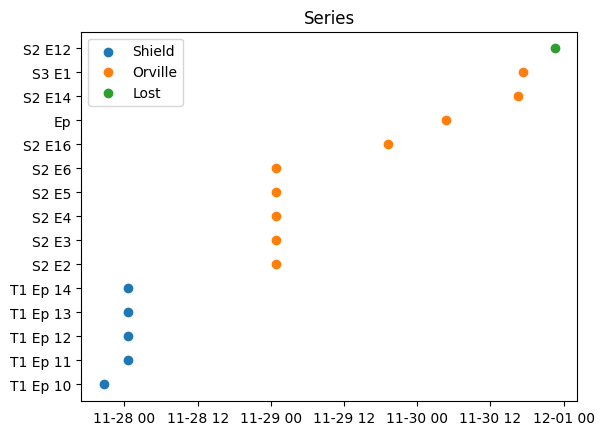

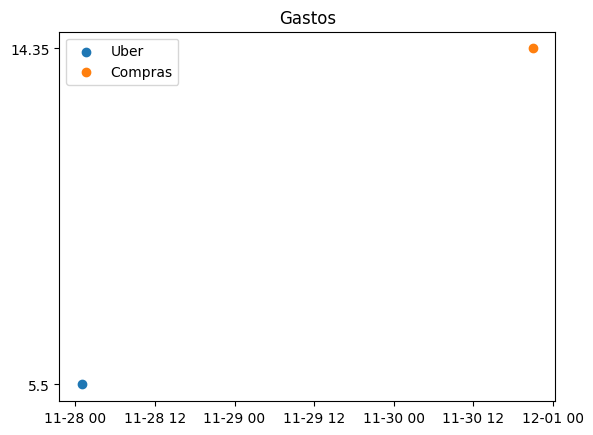

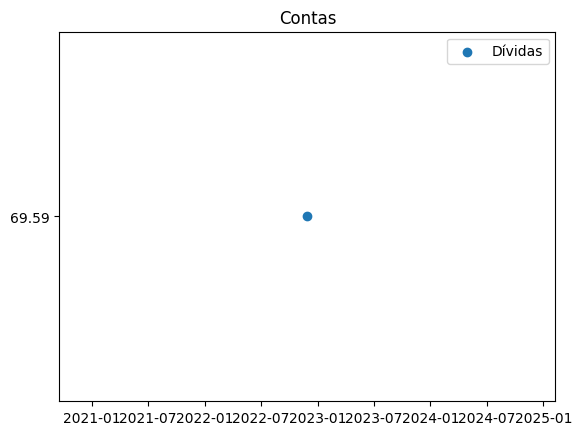

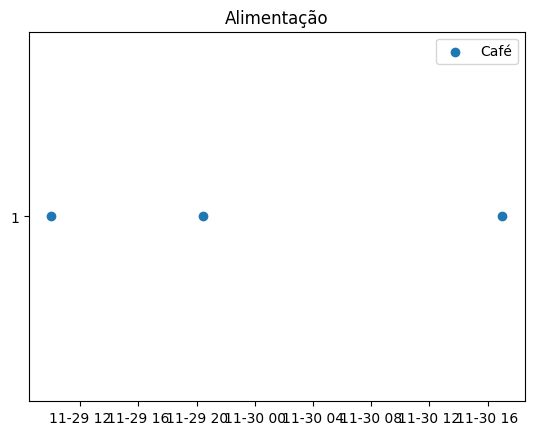

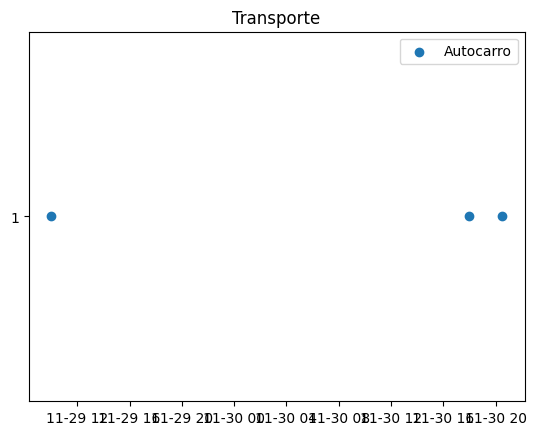

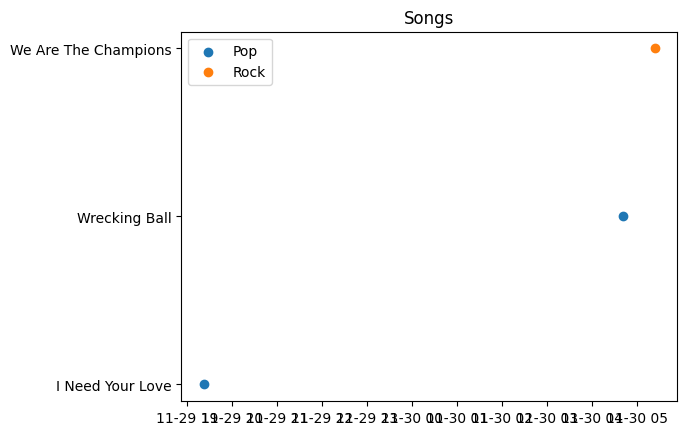

In [5]:
# plot timeseries Item of type "Autocarro" for type "Transporte" in the same plot
for category in categories:
    for type in types[categories.tolist().index(category)]:
        plt.scatter(df['Date'].loc[(df['Category'] == category) & (df['Type'] == type)], df['Item'].loc[(df['Category'] == category) & (df['Type'] == type)], label=type)
        plt.legend()
        plt.title(category)
    plt.show()

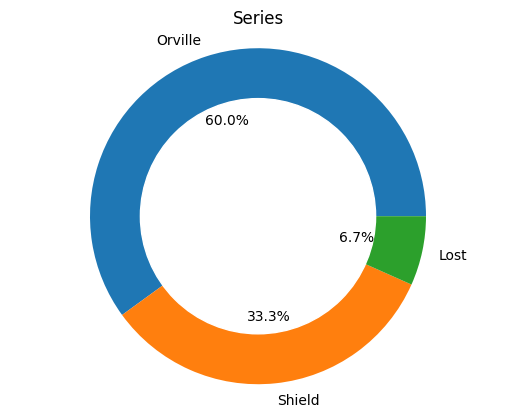

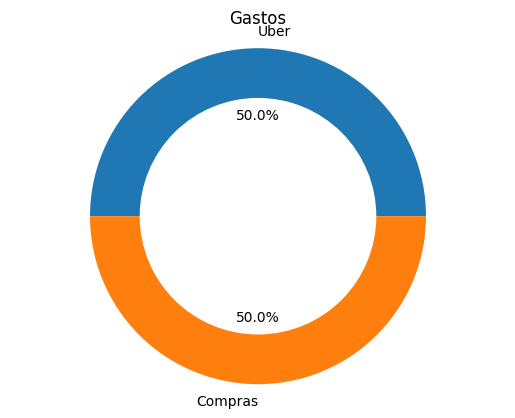

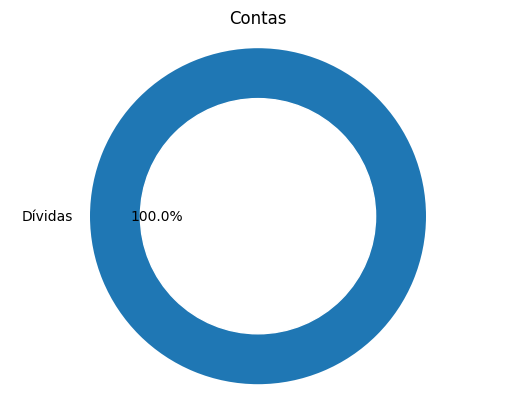

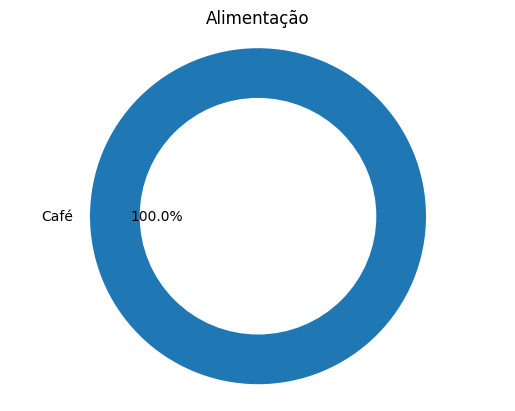

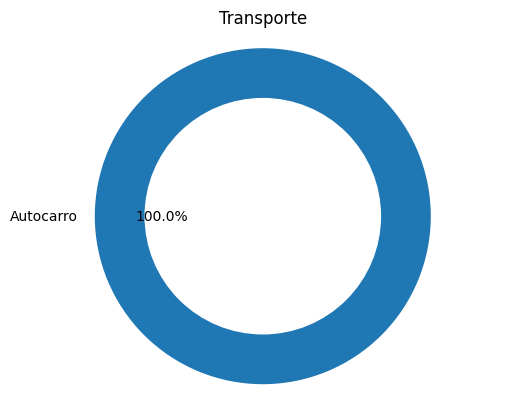

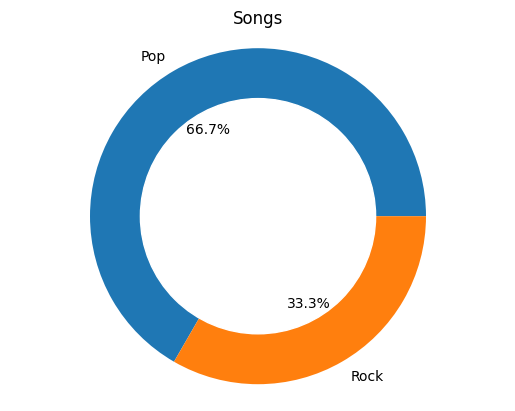

In [6]:
# pie char of each category
for category in categories:
    df_category = df.loc[df['Category'] == category]
    types_freq = df_category['Type'].value_counts()
    plt.pie(types_freq,labels=types_freq.index,labeldistance=1.1,autopct='%1.1f%%')
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    # equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')

    plt.title(category)
    plt.show()

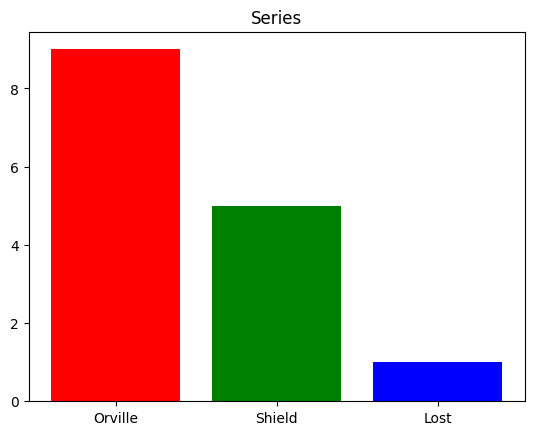

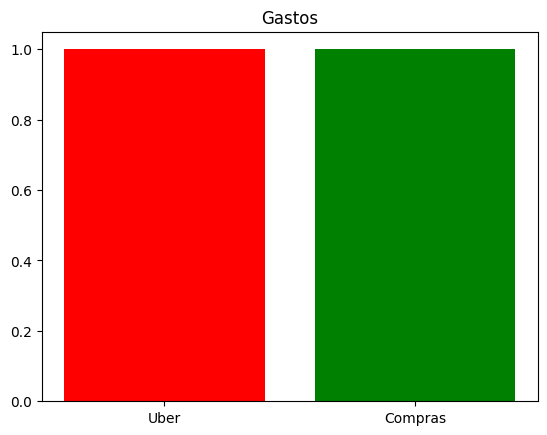

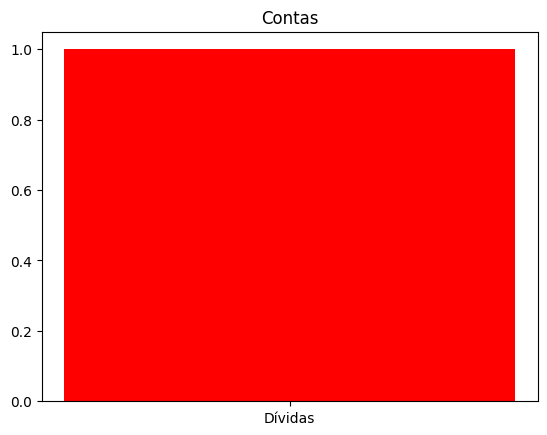

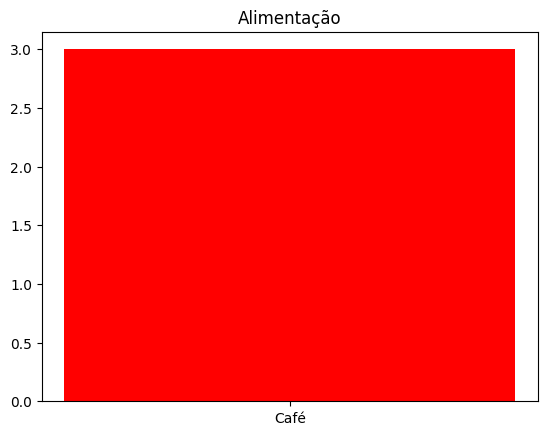

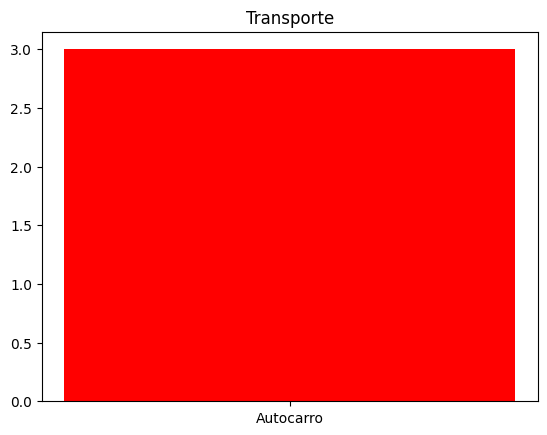

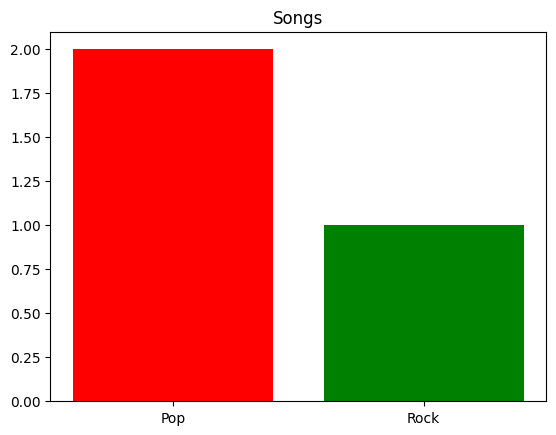

In [7]:
# bar chart of each category with colors
for category in categories:
    df_category = df.loc[df['Category'] == category]
    types_freq = df_category['Type'].value_counts()
    plt.bar(types_freq.index,types_freq,color=['red','green','blue','yellow','orange','purple','pink','brown','grey','black'])
    plt.title(category)
    plt.show()

In [8]:
# create a dataframe for each category
df_categories = list()
for category in categories:
    df_category = df.loc[df['Category'] == category]
    df_categories.append(df_category)
    
# convert Item to float if possible, else keep it as string
for df_category in df_categories:
    first_item = df_category['Item'].iloc[0]
    
    #check if first item is convertible to float
    try:
        float(first_item)
        df_category['Item'] = df_category['Item'].astype('float64')
    except ValueError:
        pass 

Uber
Dívidas
Café
Autocarro


C:\Users\tiago\AppData\Local\Temp\ipykernel_25996\1674561688.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category['Item'] = df_category['Item'].astype('float64')


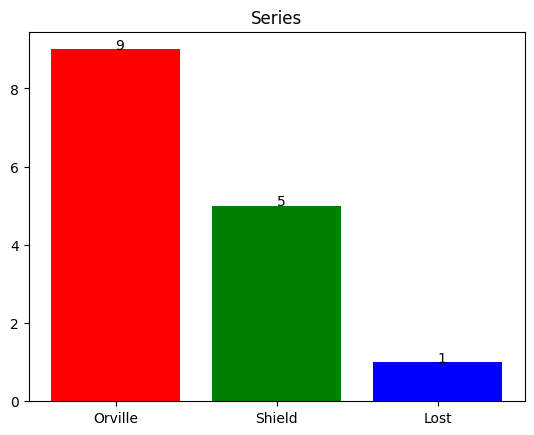

C:\Users\tiago\AppData\Local\Temp\ipykernel_25996\3938181812.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_category = df_category.groupby(['Type']).sum()


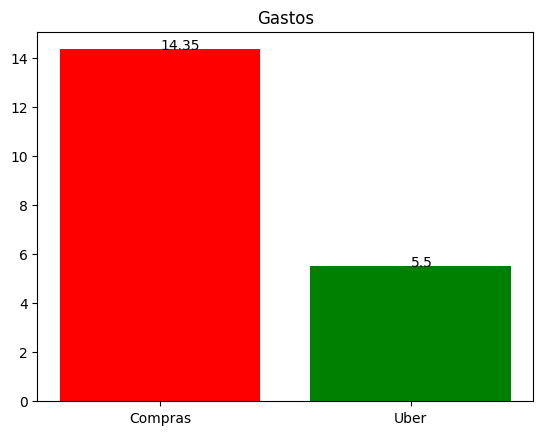

C:\Users\tiago\AppData\Local\Temp\ipykernel_25996\3938181812.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_category = df_category.groupby(['Type']).sum()


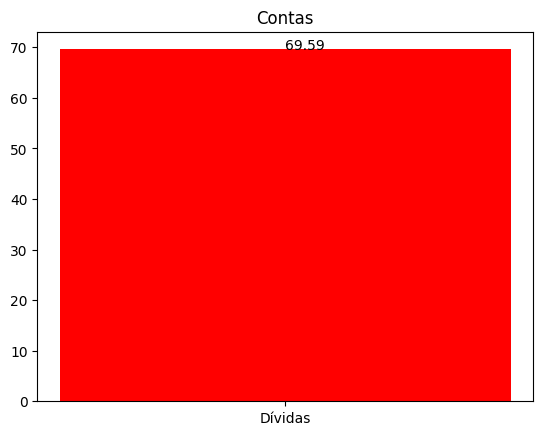

C:\Users\tiago\AppData\Local\Temp\ipykernel_25996\3938181812.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_category = df_category.groupby(['Type']).sum()


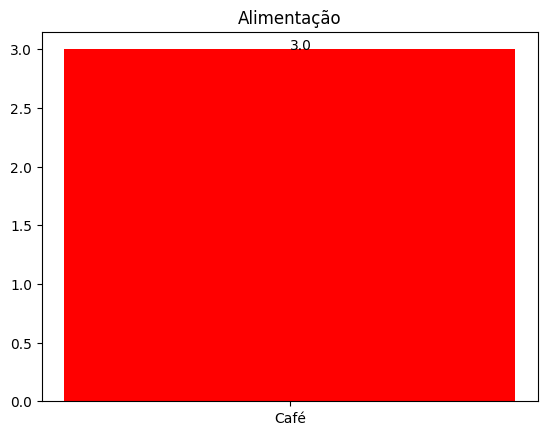

C:\Users\tiago\AppData\Local\Temp\ipykernel_25996\3938181812.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_category = df_category.groupby(['Type']).sum()


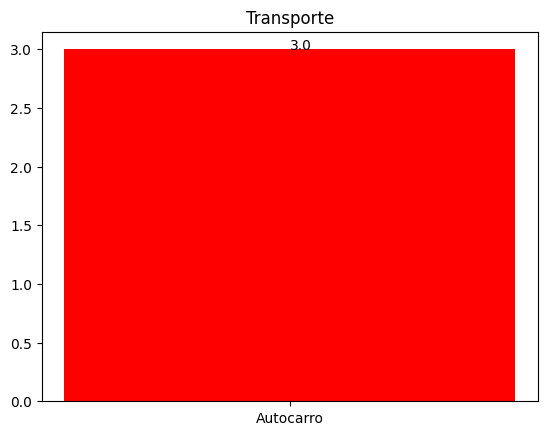

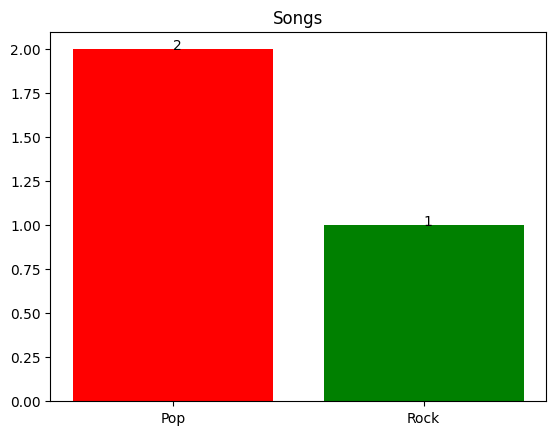

In [21]:
# sum values for each type if possible
for df_category, category in zip(df_categories,categories):
    first_item = df_category['Item'].iloc[0]
    # check if first item is numeric
    if isinstance(first_item, (str, int)):
        types_freq = df_category['Type'].value_counts()
        plt.bar(types_freq.index,types_freq,color=['red','green','blue','yellow','orange','purple','pink','brown','grey','black'])
        plt.title(category)
        # label the bar with the value
        for i, v in enumerate(types_freq):
            plt.text(i, v, str(v), color='black')
        plt.show()
    else:
        df_category = df_category.groupby(['Type']).sum()
        df_category = df_category.reset_index()
        df_category = df_category.sort_values(by=['Item'],ascending=False)
        df_category = df_category.reset_index(drop=True)
        plt.bar(df_category['Type'],df_category['Item'],color=['red','green','blue','yellow','orange','purple','pink','brown','grey','black'])
        # label the bar with the value
        for i, v in enumerate(df_category['Item']):
            plt.text(i, v, str(v), color='black')
        plt.title(category)
        plt.show()